In [ ]:
#write a program to use principal component analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

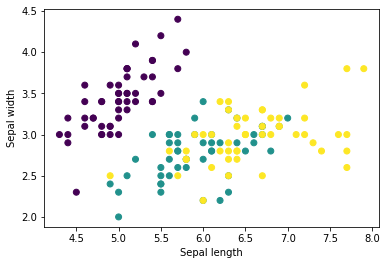

In [2]:
#load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

#plot the data
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


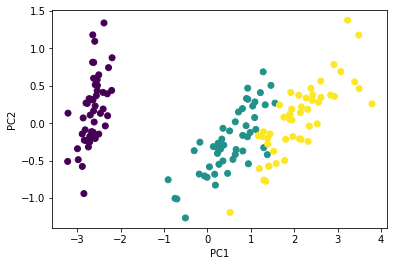

In [3]:
#perform PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

#plot the data
plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


1.0


Text(0, 0.5, 'PC2')

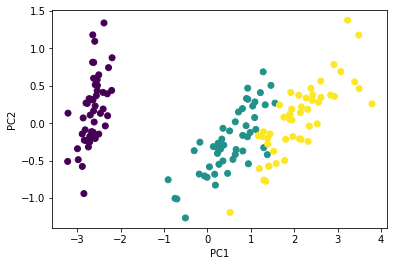

In [4]:
#use the first two principal components to classify the data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

#train the model
model = LogisticRegression()
model.fit(X_train, y_train)

#test the model
print(model.score(X_test, y_test))


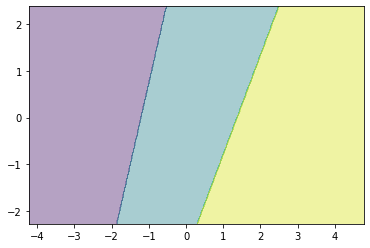

In [5]:
#plot the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()
